<a href="https://colab.research.google.com/github/R1ng1/R_lab_1/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install required packages if not already present
if (!require("stats")) install.packages("stats", repos = "http://cran.us.r-project.org")
if (!require("ggplot2")) install.packages("ggplot2", repos = "http://cran.us.r-project.org")
if (!require("FactoMineR")) install.packages("FactoMineR", repos = "http://cran.us.r-project.org")

# Load the packages
library(stats)      # Core PCA functions
library(ggplot2)    # Advanced visualizations
library(FactoMineR) # Additional PCA tools

Loading required package: ggplot2

Loading required package: FactoMineR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘FactoMineR’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’




Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

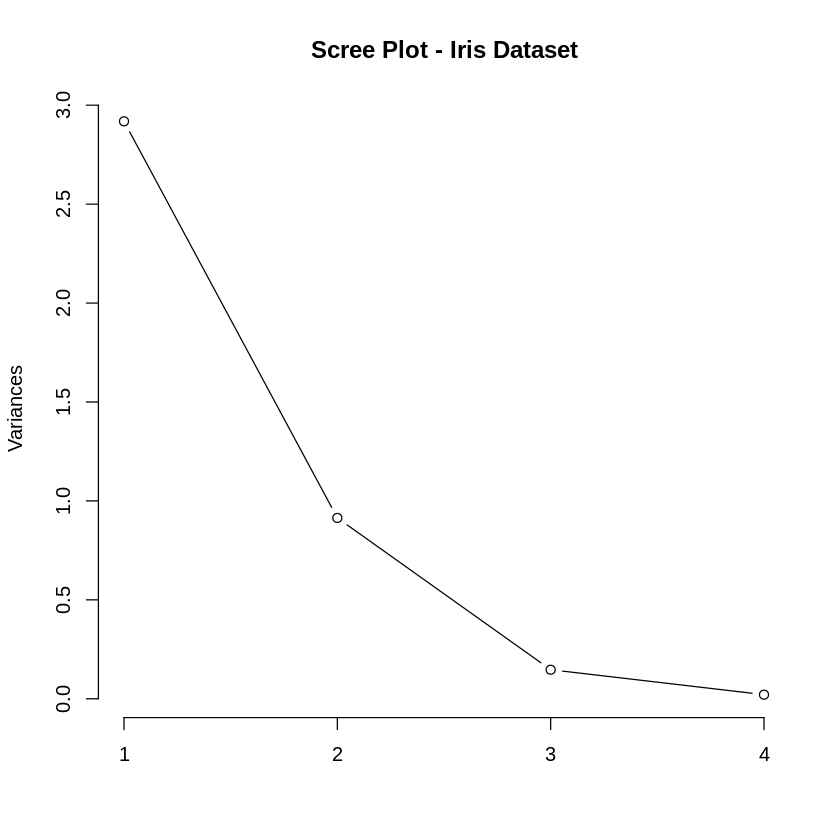

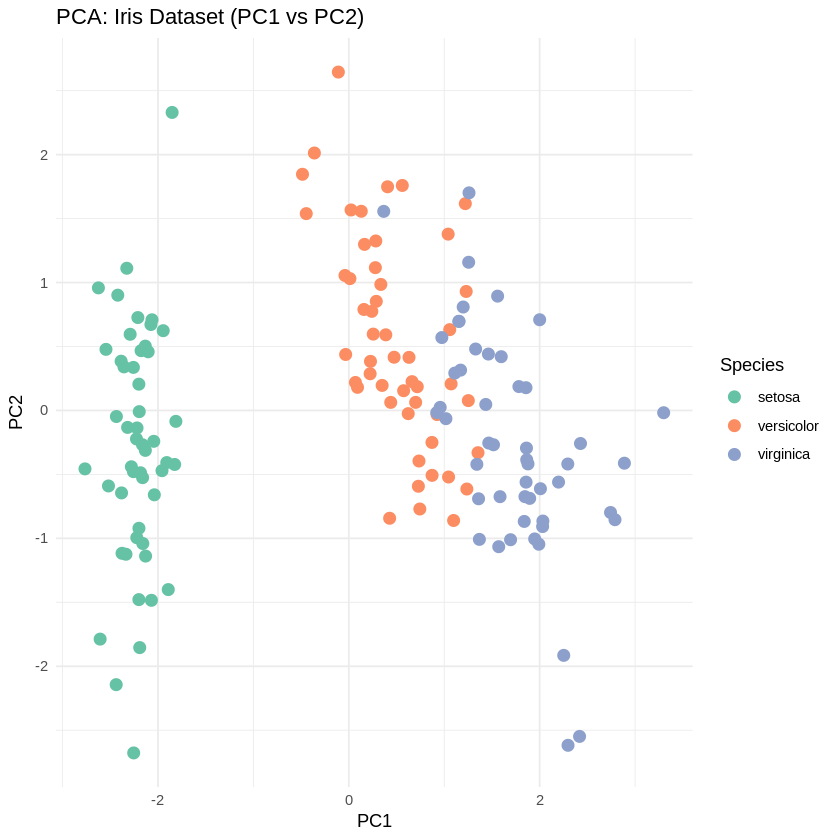

In [10]:
# Load and prepare the iris dataset
data(iris)
pca_data_iris <- iris[, 1:4]  # Numeric columns only

# Standardize the data
pca_data_iris_scaled <- scale(pca_data_iris)

# Perform PCA
pca_iris <- prcomp(pca_data_iris_scaled, center = TRUE, scale. = TRUE)

# Summary of results
summary(pca_iris)

# Visualize: Scree plot
plot(pca_iris, type = "lines", main = "Scree Plot - Iris Dataset")

# Visualize: Scatter plot of PC1 vs PC2
scores_iris <- as.data.frame(pca_iris$x)
scores_iris$Species <- iris$Species
ggplot(scores_iris, aes(x = PC1, y = PC2, color = Species)) +
  geom_point(size = 3) +
  labs(title = "PCA: Iris Dataset (PC1 vs PC2)", x = "PC1", y = "PC2") +
  theme_minimal() +
  scale_color_brewer(palette = "Set2")

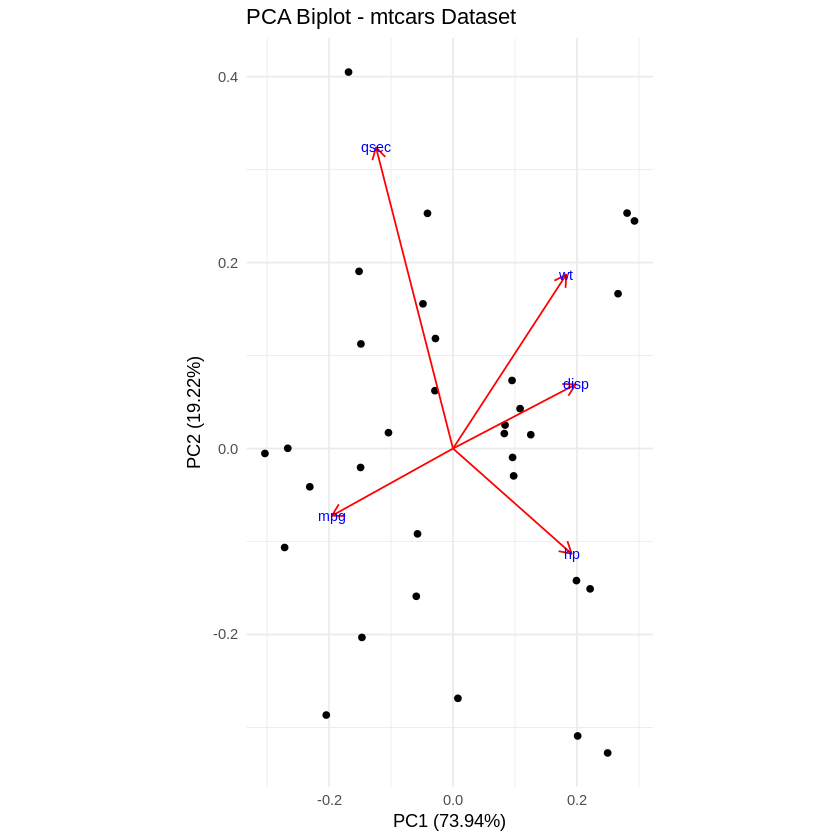

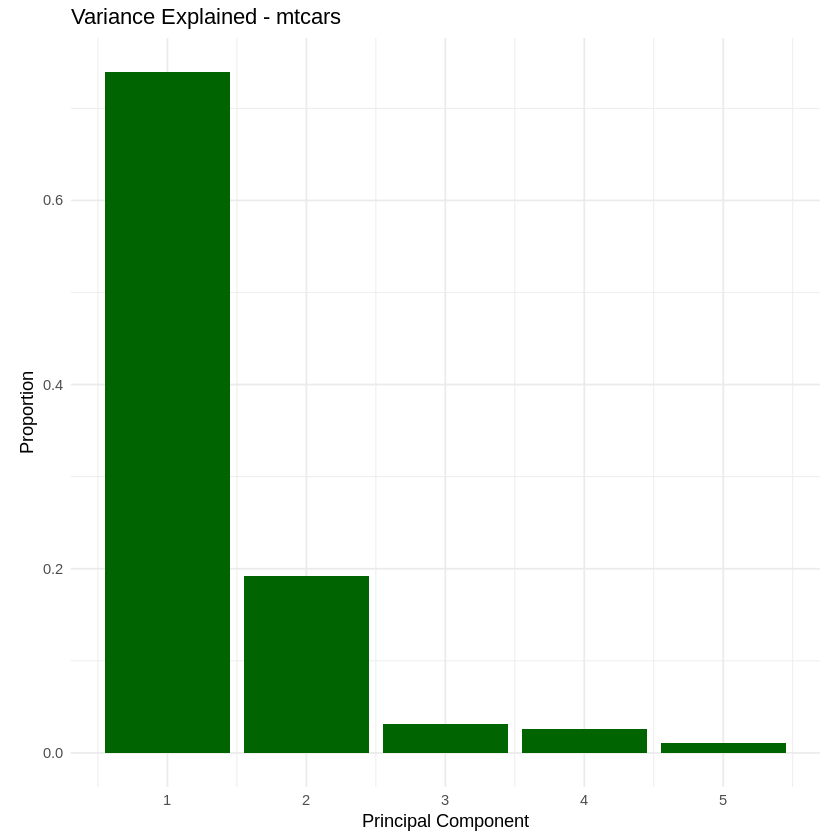

In [19]:
# Install and load ggfortify if not already installed
if (!require("ggfortify")) install.packages("ggfortify", repos = "http://cran.us.r-project.org")
library(ggfortify)

# Visualize: Enhanced Biplot with ggfortify
autoplot(pca_mtcars, data = mtcars, loadings = TRUE, loadings.label = TRUE,
         loadings.label.size = 3, loadings.label.colour = "blue", # Adjust label size and color
         loadings.colour = "red", loadings.arrow.size = 0.8) + # Adjust arrow color and size
  theme_minimal() +
  labs(title = "PCA Biplot - mtcars Dataset") +
  coord_fixed(ratio = 1.5)  # Adjust the view ratio

# Variance explained plot
var_exp_mtcars <- pca_mtcars$sdev^2 / sum(pca_mtcars$sdev^2)
ggplot(data.frame(PC = 1:length(var_exp_mtcars), Variance = var_exp_mtcars),
       aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "darkgreen") +
  labs(title = "Variance Explained - mtcars", x = "Principal Component", y = "Proportion") +
  theme_minimal() +
  theme(aspect.ratio = 1)  # Adjust the aspect ratio for the variance explained plot

Importance of components:
                          PC1    PC2    PC3    PC4
Standard deviation     1.0736 1.0243 0.9762 0.9193
Proportion of Variance 0.2882 0.2623 0.2382 0.2113
Cumulative Proportion  0.2882 0.5505 0.7887 1.0000

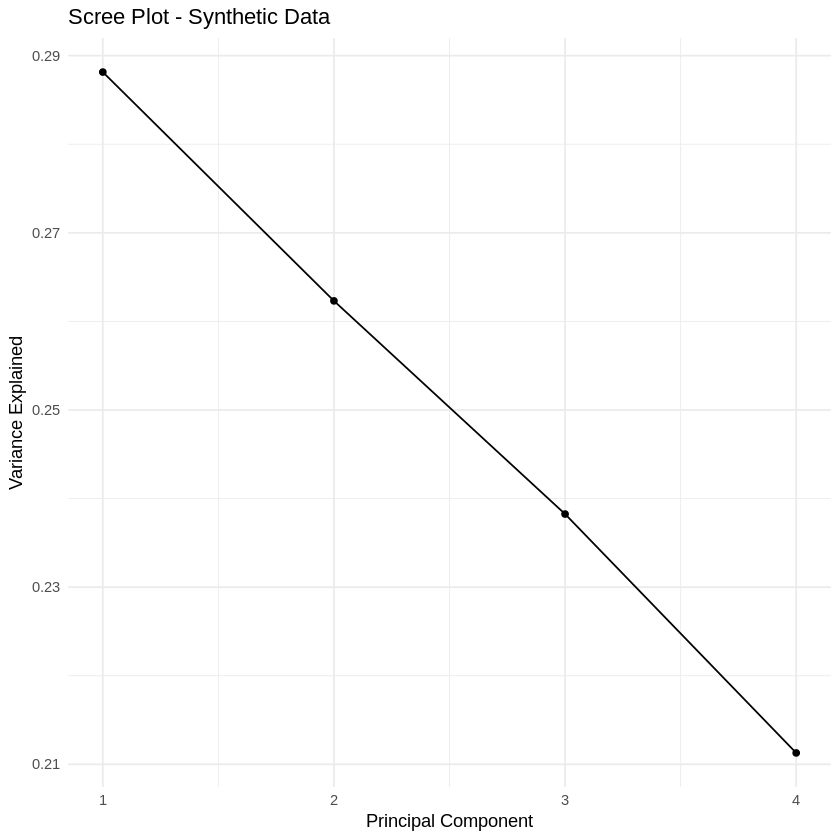

In [12]:
# Generate synthetic dataset
set.seed(123)
synth_data <- data.frame(
  Var1 = rnorm(100, mean = 10, sd = 2),
  Var2 = rnorm(100, mean = 5, sd = 1.5),
  Var3 = rnorm(100, mean = 8, sd = 3),
  Var4 = rnorm(100, mean = 15, sd = 4)
)

# Standardize the data
synth_data_scaled <- scale(synth_data)

# Perform PCA
pca_synth <- prcomp(synth_data_scaled, center = TRUE, scale. = TRUE)

# Summary of results
summary(pca_synth)

# Visualize: Scree plot with ggplot2
var_exp_synth <- pca_synth$sdev^2 / sum(pca_synth$sdev^2)
ggplot(data.frame(PC = 1:length(var_exp_synth), Variance = var_exp_synth),
       aes(x = PC, y = Variance)) +
  geom_line() + geom_point() +
  labs(title = "Scree Plot - Synthetic Data", x = "Principal Component", y = "Variance Explained") +
  theme_minimal()

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

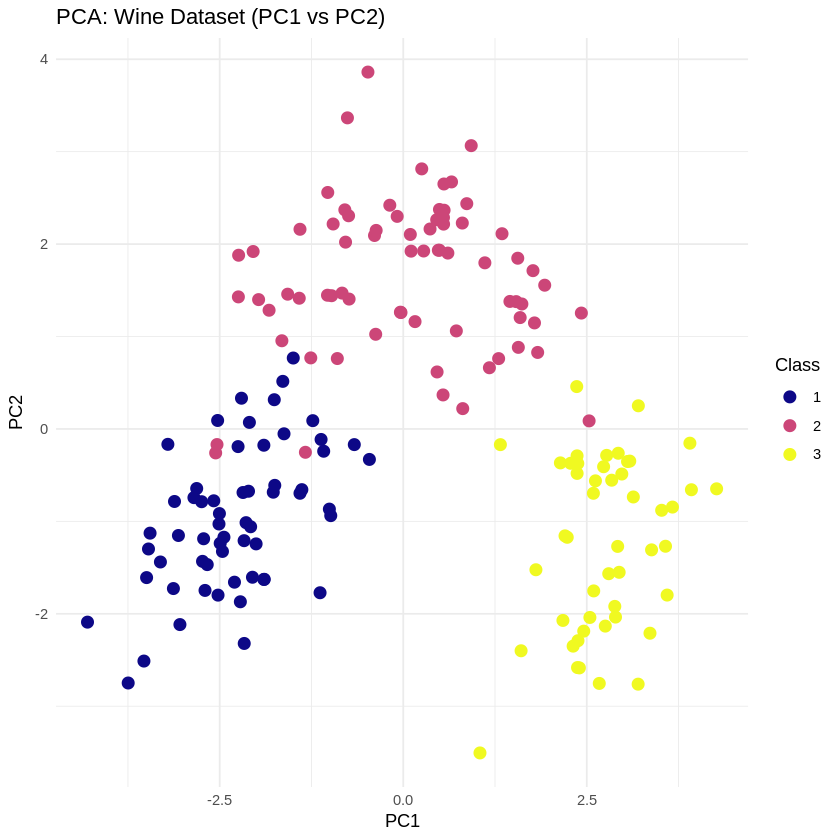

In [17]:
# Load wine dataset (assuming it's available or downloaded)
# For Colab, you may need to upload it manually or fetch it
wine <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = FALSE)
colnames(wine) <- c("Class", "Alcohol", "Malic", "Ash", "Alcalinity", "Mg", "Phenols",
                    "Flavanoids", "Nonflavanoid", "Proanth", "Color", "Hue", "OD280", "Proline")
pca_data_wine <- wine[, 2:14]  # Exclude class column

# Standardize the data
pca_data_wine_scaled <- scale(pca_data_wine)

# Perform PCA
pca_wine <- prcomp(pca_data_wine_scaled, center = TRUE, scale. = TRUE)

# Summary of results
summary(pca_wine)

# Install viridisLite package if not already installed
if (!require("viridisLite")) install.packages("viridisLite", repos = "http://cran.us.r-project.org")

# Load the viridisLite package
library(viridisLite)

# Visualize: PC1 vs PC2 with class coloring using "plasma" color scheme
scores_wine <- as.data.frame(pca_wine$x)
scores_wine$Class <- as.factor(wine$Class)
ggplot(scores_wine, aes(x = PC1, y = PC2, color = Class)) +
  geom_point(size = 3) +
  labs(title = "PCA: Wine Dataset (PC1 vs PC2)", x = "PC1", y = "PC2") +
  theme_minimal() +
  scale_color_viridis_d(option = "plasma")

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

Loading required package: viridis

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘viridis’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite



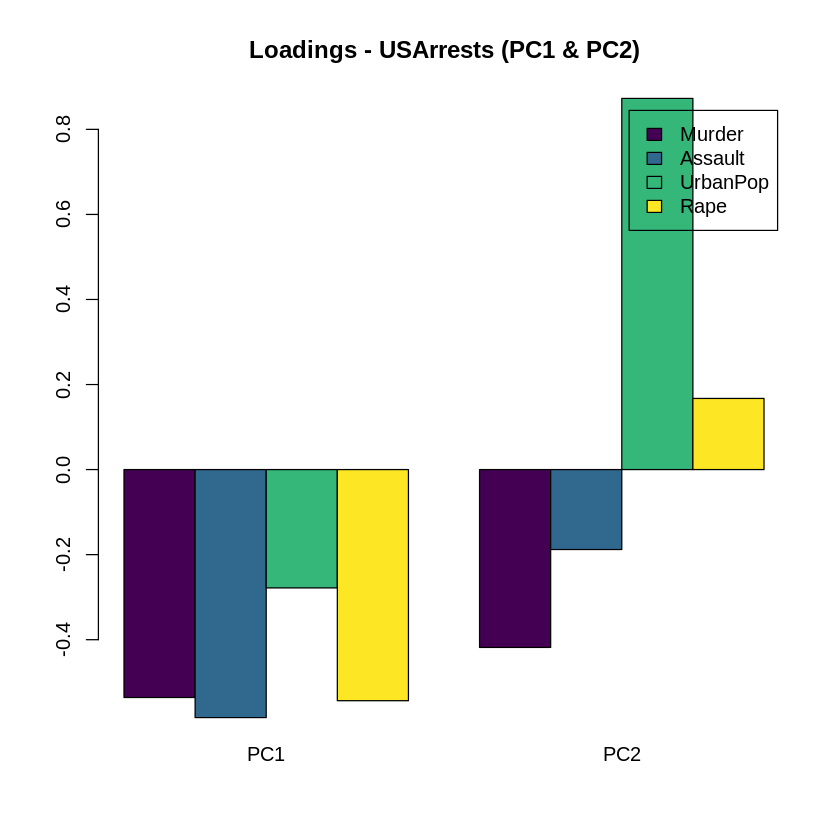

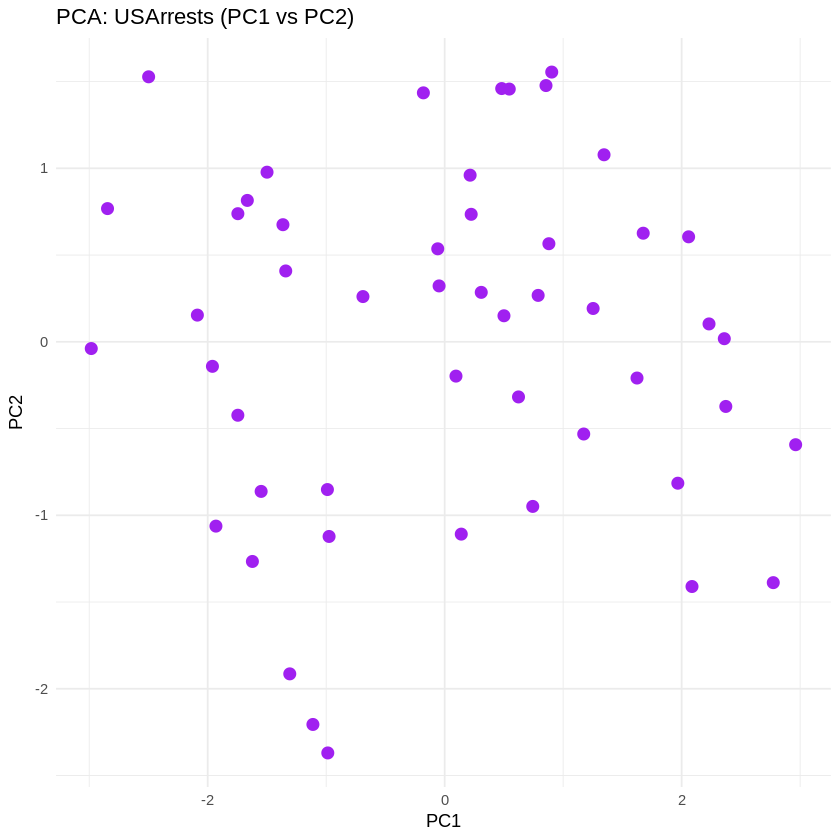

In [15]:
# Load and prepare the USArrests dataset
data(USArrests)
pca_data_us <- USArrests  # All columns are numeric

# Standardize the data
pca_data_us_scaled <- scale(pca_data_us)

# Perform PCA
pca_us <- prcomp(pca_data_us_scaled, center = TRUE, scale. = TRUE)

# Summary of results
summary(pca_us)

# Install viridis package if not already installed
if (!require("viridis")) install.packages("viridis", repos = "http://cran.us.r-project.org")

# Load the viridis package
library(viridis)

# Visualize: Loadings heatmap with viridis color scheme
barplot(pca_us$rotation[, 1:2], beside = TRUE,
        col = viridis(nrow(pca_us$rotation)),  # Use viridis colors
        legend = rownames(pca_us$rotation),
        main = "Loadings - USArrests (PC1 & PC2)")

# PC1 vs PC2 scatter plot
scores_us <- as.data.frame(pca_us$x)
ggplot(scores_us, aes(x = PC1, y = PC2)) +
  geom_point(size = 3, color = "purple") +
  labs(title = "PCA: USArrests (PC1 vs PC2)", x = "PC1", y = "PC2") +
  theme_minimal()